In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
boston = load_boston() # load the data set
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# target variable
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

### Lets do the EDA steps

In [6]:
# varibale Identification

data.info() # to check the Variable details.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# lets take the summary of data by describe function
data.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([483.,  15.,   5.,   1.,   2.]),
 array([6.3200000e-03, 1.7800296e+01, 3.5594272e+01, 5.3388248e+01,
        7.1182224e+01, 8.8976200e+01]),
 <a list of 5 Patch objects>)

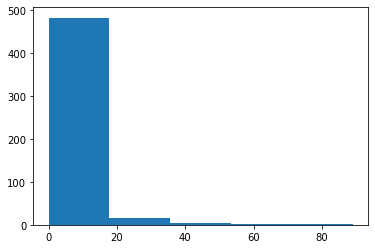

In [8]:
# Univariate Analysis
plt.hist(data["CRIM"],bins=5)

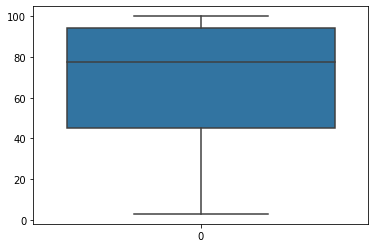

In [9]:
sns.boxplot(data=data["AGE"])

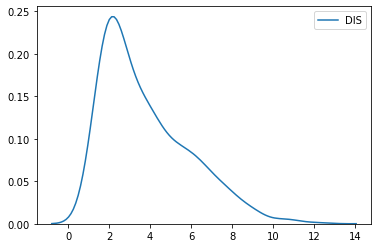

In [10]:
sns.kdeplot(data=data["DIS"])

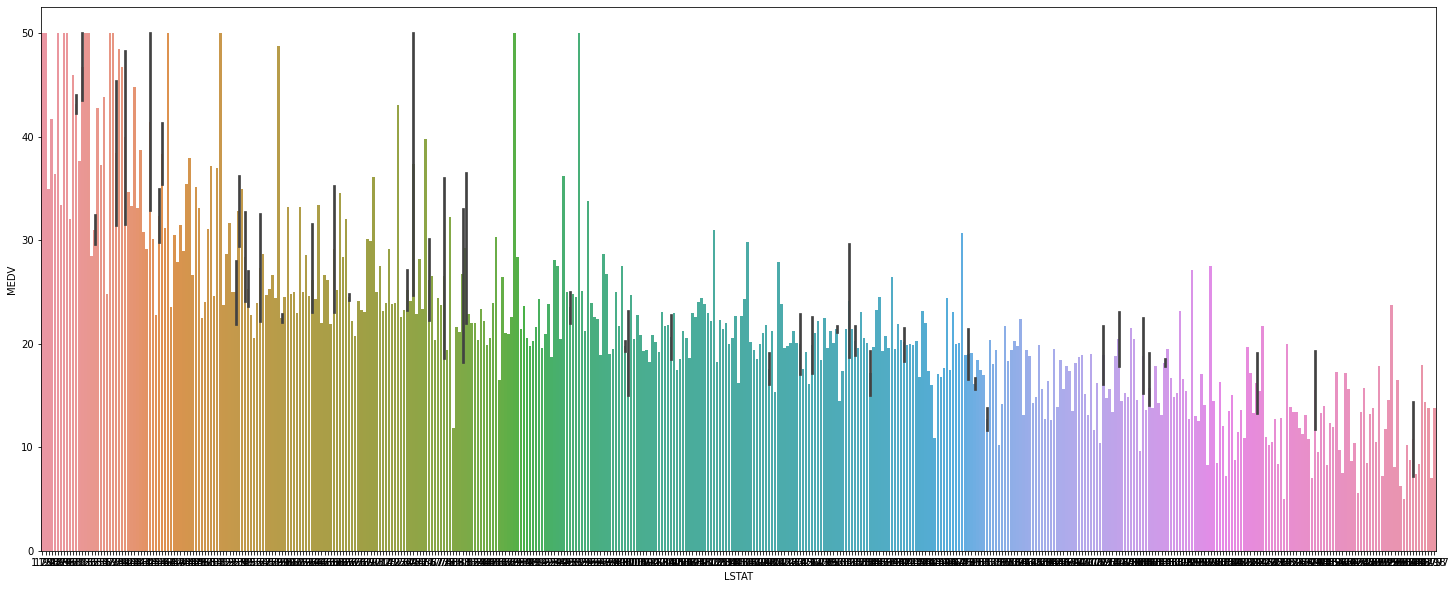

In [11]:
# Bivariate Analysis
plt.figure(figsize=(25,10))
sns.barplot(x=data["LSTAT"],y=data["MEDV"],data=data)

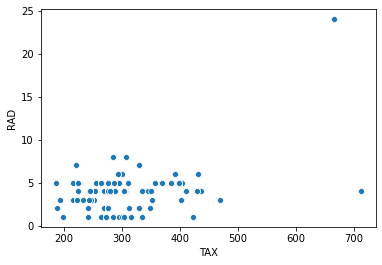

In [12]:
sns.scatterplot(x=data["TAX"],y=data["RAD"])

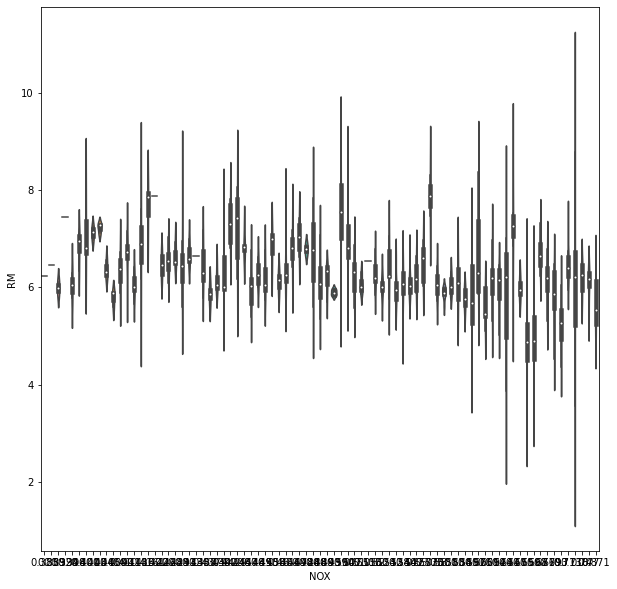

In [13]:
plt.figure(figsize=(10,10))
sns.violinplot(x=data["NOX"],y=data["RM"])

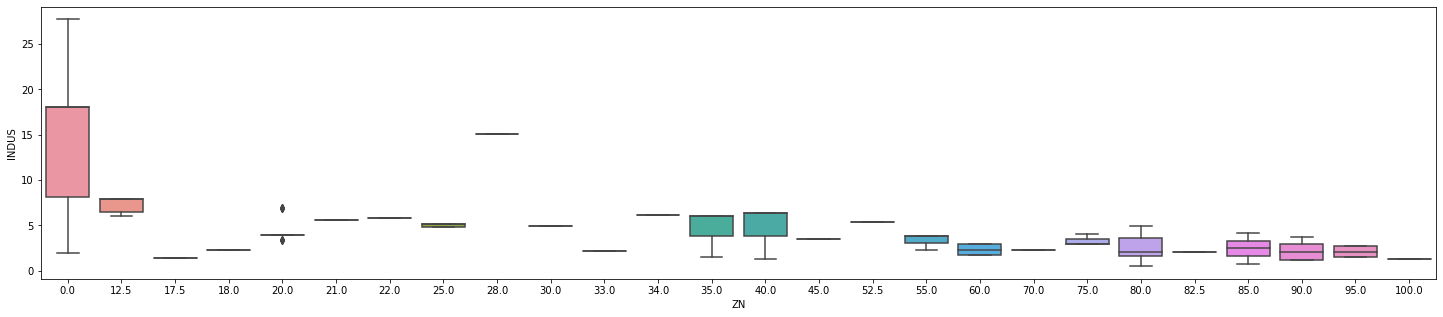

In [14]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data["ZN"],y=data["INDUS"])

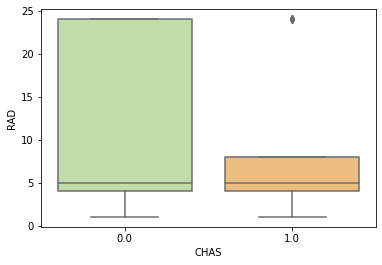

In [15]:
sns.boxplot(x=data["CHAS"],y=data["RAD"],palette='Spectral_r')

### checking missing value in data set

In [16]:
data.apply(lambda x: sum(x.isnull()))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
data.apply(lambda x: len(x.unique()))

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [18]:
#Determine average chas of a product
chas_avg = data.pivot_table(values='CHAS', index='AGE')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['CHAS'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))

Number of 0 values initially: 471


In [19]:
data['CHAS'].replace(0, np.nan, inplace= True)
print('Number of 0 values after modification: %d'%sum(data['CHAS'] == 0))

Number of 0 values after modification: 0


In [20]:
# Lets check the missing value again
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [21]:
data['CHAS'].fillna(data['CHAS'].mean(), inplace=True)

In [22]:
data['CHAS'].describe()

count    506.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: CHAS, dtype: float64

In [23]:
all_inputs = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
all_classes = data['MEDV']

In [24]:
print(all_inputs.shape)
print(all_classes.shape)

(506, 13)
(506,)


In [25]:
scaler = StandardScaler()
scalar1 = scaler.fit_transform(all_inputs)
scalar1

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [26]:
X_scaled1 = pd.DataFrame(scalar1)
X_scaled1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled1,all_classes,train_size=0.70,random_state=250)

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
x_train.shape , x_test.shape ,y_train.shape ,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred = lr.predict(x_test)
y_pred

array([18.43683259, 37.26695286, 28.28202314, 27.82836322, 30.61168479,
       31.60346533, 28.35700829, 28.79342071, 27.23436081, 21.9195433 ,
       15.87906199, 33.47894297, 22.57540857, 16.5938503 , 19.00333843,
       25.93865809, 14.21762223, 25.64915212, 23.98922325, 23.57682754,
       21.46486454, 17.58986929, 20.6698522 , 17.52457884, 22.45022003,
       23.6828888 , 26.30096256, 30.79871862, 19.94361029, 19.11557091,
       31.16771944, 15.92495752, 12.90161672, 29.61717359, 38.05044771,
       16.3548794 , 22.24857554, 39.89950107,  6.43924834, 20.629314  ,
       22.9665402 , 31.03541893, 22.08549437, 12.23226417, 23.98341232,
       12.93800634, 22.11156726, 12.52835615, 22.6206285 , 24.27397743,
       24.97813378, 15.99107355, 16.28659884, 13.58691021, 20.48428378,
       24.66609806, 19.01451951, 16.93480072, 11.44549734, 22.83656651,
       15.22482777, 20.00935343, 14.20601539, 25.74618945, 33.14877732,
       27.48738772, 27.39728665, 15.45641876, 17.70476926, 30.60

In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.6612660930700295

In [32]:
# Using the Decision tree 
dt =DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
rtest = dt.predict(x_test)
rtest

array([21.9, 50. , 29.6, 20.1, 27.5, 33.8, 24.5, 22. , 24.8, 20.5, 24.5,
       28.4, 11.9, 17.1, 16.4, 23. , 12.3, 20.5, 22.5, 21.2, 23.8, 24.5,
       21.1, 20.6, 21.1, 19.1, 22.9, 35.2, 20.1, 22.7, 32.7, 16.6, 12.7,
       22.3, 50. , 12.7, 19.1, 50. , 13.3, 20.9, 29.6, 26.6, 20. , 24.3,
       20.3, 13.9, 19.7, 18.2, 22.9, 22.9, 22.1, 18.4, 16.2, 11.8, 24.4,
       25.3, 17.1, 15.7, 17.8, 24.3,  9.6, 21.4, 16.4, 20.5, 33.3, 21.4,
       28. , 18.2, 16.7, 25. , 24.4, 24.4, 33.3, 10.5, 33.1, 21.5, 19.3,
       17.1, 14.6, 10.2, 33.4, 18.2, 27.5, 31. , 15.6, 33. , 22.2, 19.5,
       24.4, 31.2, 35.1, 30.7, 17.1, 24.5, 20.8, 20.5, 23.3, 10.2, 10.2,
       24.4, 10.5, 17.8, 20.5, 19.1, 19.5, 20. , 16.8,  7.4, 50. , 24.4,
       18.1, 21.4, 10.5, 33.8, 35.1, 22.2, 29.8, 31.6, 12.6, 10.8, 37.2,
       43.8, 23.4, 19.3, 16.6, 29.8, 15.2, 14.2, 34.9, 22.6, 20. , 18.6,
       20.5, 21.4, 17.8, 18.5, 20.7, 36.1, 23. , 29.8, 22.6, 25. , 19.8,
       19.5, 17.8, 20.9, 31.2, 22.2, 20.3, 20. , 43

In [34]:
RFINAL =r2_score(y_test,rtest)
RFINAL

0.747773629903146

In [35]:
# lets use random forest algorithm
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
predict=rf.predict(x_test)

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
rf_score = r2_score(y_test,predict)
rf_score

0.842016792706757